# Obtenção da popularidade

Nesta parte, deve ser feita uma função que recebe um dataframe com as colunas 'playerName' e 'season', e adiciona uma coluna 'popularity' ou algun nome melhor, que mostra a popularidade de um jogador no período daquela season

Usar a biblioteca pytrends:

https://pypi.org/project/pytrends/

https://konstantinstadler.site/posts/plotting-google-trends-search-terms-in-python/

In [22]:
import pandas as pd
from pytrends.request import TrendReq
import time
from tqdm import tqdm
import os
import matplotlib.pyplot as plt

In [2]:
pytrends = TrendReq(tz=360)

def getKeywordPop(kw, start_date, end_date):

    palavras_chave = ['einstein' , kw]

    pytrends.build_payload(palavras_chave, timeframe=f'{start_date} {end_date}')

    dados_tendencias = pytrends.interest_over_time()

    result = dados_tendencias.sum().sort_values(ascending=False)

    return result[kw] / result['einstein']

In [35]:
df = pd.read_csv('data/transfers_stats/new/all/standard.csv')#[['playerName', 'team', 'season']].drop_duplicates()
df['startDate'] = df['season'].astype(str) + '-08-05'
df['endDate'] = (df['season']+1).astype(str) + '-05-28'
df = df[['playerName', 'season','startDate', 'endDate']]
df

,playerName,season,startDate,endDate
0,Ethan Ampadu,2017,2017-08-05,2018-05-28
1,Davinson Sánchez,2017,2017-08-05,2018-05-28
2,Kyle Walker,2017,2017-08-05,2018-05-28
3,Ederson,2017,2017-08-05,2018-05-28
4,Douglas Luiz,2017,2017-08-05,2018-05-28
...,...,...,...,...
2669,Oliver Zandén,2022,2022-08-05,2023-05-28
2670,Bafodé Diakité,2022,2022-08-05,2023-05-28
2671,Fernand Mayembo,2022,2022-08-05,2023-05-28
2672,Rayan Raveloson,2022,2022-08-05,2023-05-28


In [15]:
df = df.drop(df.index[:252+791+475+232])

In [19]:
df

,search,season,startDate,endDate
1750,Ricardo Rodríguez,2020,2020-08-05,2021-05-28
1751,Álex Berenguer,2020,2020-08-05,2021-05-28
1752,Álex Berenguer,2020,2020-08-05,2021-05-28
1753,Kevin Bonifazi,2020,2020-08-05,2021-05-28
1754,Gerard Deulofeu,2020,2020-08-05,2021-05-28
...,...,...,...,...
2669,Oliver Zandén,2022,2022-08-05,2023-05-28
2670,Bafodé Diakité,2022,2022-08-05,2023-05-28
2671,Fernand Mayembo,2022,2022-08-05,2023-05-28
2672,Rayan Raveloson,2022,2022-08-05,2023-05-28


In [21]:
import numpy as np


# Dividir o DataFrame em 5 partes
df_parts = np.array_split(df, 5)

for i, part in enumerate(df_parts):
    popularities = []
    for index, row in tqdm(part.iterrows(), total=part.shape[0]):
        search = row['search']
        start_date = row['startDate']
        end_date = row['endDate']
        while True:
            try:
                popularities.append(getKeywordPop(search, start_date, end_date))
                time.sleep(1)
                break  # Sai do loop while se a chamada for bem-sucedida
            except Exception as e:
                print(f"Erro: {e}")
                print("Pausing for 5 seconds and retrying...")
                time.sleep(5)
                os.system('clear') or None        
    np.save('popularities_part'+str(i+5)+'.npy', popularities)
    time.sleep(50)
    

 28%|██▊       | 52/185 [02:26<06:27,  2.92s/it]

Erro: The request failed: Google returned a response with code 429
Pausing for 5 seconds and retrying...


 29%|██▉       | 54/185 [02:38<09:03,  4.15s/it]

Erro: The request failed: Google returned a response with code 429
Pausing for 5 seconds and retrying...
Erro: The request failed: Google returned a response with code 429
Pausing for 5 seconds and retrying...
Erro: The request failed: Google returned a response with code 429
Pausing for 5 seconds and retrying...
Erro: The request failed: Google returned a response with code 429
Pausing for 5 seconds and retrying...


 30%|███       | 56/185 [03:12<20:08,  9.37s/it]

Erro: The request failed: Google returned a response with code 429
Pausing for 5 seconds and retrying...
Erro: The request failed: Google returned a response with code 429
Pausing for 5 seconds and retrying...


 31%|███▏      | 58/185 [03:30<18:37,  8.80s/it]

Erro: The request failed: Google returned a response with code 429
Pausing for 5 seconds and retrying...


 32%|███▏      | 59/185 [03:40<19:14,  9.16s/it]

Erro: The request failed: Google returned a response with code 429
Pausing for 5 seconds and retrying...
Erro: The request failed: Google returned a response with code 429
Pausing for 5 seconds and retrying...
Erro: The request failed: Google returned a response with code 429
Pausing for 5 seconds and retrying...


 32%|███▏      | 60/185 [04:03<27:35, 13.24s/it]

Erro: The request failed: Google returned a response with code 429
Pausing for 5 seconds and retrying...
Erro: The request failed: Google returned a response with code 429
Pausing for 5 seconds and retrying...
Erro: The request failed: Google returned a response with code 429
Pausing for 5 seconds and retrying...


 34%|███▎      | 62/185 [04:30<25:18, 12.35s/it]

Erro: The request failed: Google returned a response with code 429
Pausing for 5 seconds and retrying...


 34%|███▍      | 63/185 [04:40<23:38, 11.63s/it]

Erro: The request failed: Google returned a response with code 429
Pausing for 5 seconds and retrying...


 36%|███▌      | 66/185 [04:56<13:50,  6.98s/it]

Erro: The request failed: Google returned a response with code 429
Pausing for 5 seconds and retrying...


 36%|███▌      | 67/185 [05:06<15:41,  7.98s/it]

Erro: The request failed: Google returned a response with code 429
Pausing for 5 seconds and retrying...


 39%|███▉      | 72/185 [05:30<08:33,  4.54s/it]

Erro: The request failed: Google returned a response with code 429
Pausing for 5 seconds and retrying...
Erro: The request failed: Google returned a response with code 429
Pausing for 5 seconds and retrying...


 39%|███▉      | 73/185 [05:47<15:33,  8.34s/it]

Erro: The request failed: Google returned a response with code 429
Pausing for 5 seconds and retrying...


 41%|████      | 75/185 [06:00<13:09,  7.18s/it]

Erro: The request failed: Google returned a response with code 429
Pausing for 5 seconds and retrying...


 41%|████      | 76/185 [06:10<14:44,  8.11s/it]

Erro: The request failed: Google returned a response with code 429
Pausing for 5 seconds and retrying...


 42%|████▏     | 77/185 [06:21<15:52,  8.82s/it]

Erro: The request failed: Google returned a response with code 429
Pausing for 5 seconds and retrying...
Erro: The request failed: Google returned a response with code 429
Pausing for 5 seconds and retrying...
Erro: The request failed: Google returned a response with code 429
Pausing for 5 seconds and retrying...


 44%|████▍     | 81/185 [06:55<11:47,  6.81s/it]

Erro: The request failed: Google returned a response with code 429
Pausing for 5 seconds and retrying...


 44%|████▍     | 82/185 [07:06<13:29,  7.86s/it]

Erro: The request failed: Google returned a response with code 429
Pausing for 5 seconds and retrying...


 58%|█████▊    | 107/185 [08:30<03:54,  3.00s/it]

Erro: The request failed: Google returned a response with code 429
Pausing for 5 seconds and retrying...


 59%|█████▉    | 109/185 [08:43<05:30,  4.35s/it]

Erro: The request failed: Google returned a response with code 429
Pausing for 5 seconds and retrying...


 61%|██████    | 112/185 [09:00<05:37,  4.62s/it]

Erro: The request failed: Google returned a response with code 429
Pausing for 5 seconds and retrying...
Erro: The request failed: Google returned a response with code 429
Pausing for 5 seconds and retrying...


 63%|██████▎   | 117/185 [09:29<04:56,  4.36s/it]

Erro: The request failed: Google returned a response with code 429
Pausing for 5 seconds and retrying...


 64%|██████▍   | 118/185 [09:39<06:50,  6.13s/it]

Erro: The request failed: Google returned a response with code 429
Pausing for 5 seconds and retrying...


 64%|██████▍   | 119/185 [09:49<08:01,  7.30s/it]

Erro: The request failed: Google returned a response with code 429
Pausing for 5 seconds and retrying...


 66%|██████▋   | 123/185 [10:07<04:39,  4.52s/it]

Erro: The request failed: Google returned a response with code 429
Pausing for 5 seconds and retrying...


 67%|██████▋   | 124/185 [10:17<06:24,  6.30s/it]

Erro: The request failed: Google returned a response with code 429
Pausing for 5 seconds and retrying...


 69%|██████▊   | 127/185 [10:34<05:03,  5.23s/it]

Erro: The request failed: Google returned a response with code 429
Pausing for 5 seconds and retrying...
Erro: The request failed: Google returned a response with code 429
Pausing for 5 seconds and retrying...


 69%|██████▉   | 128/185 [10:51<08:17,  8.73s/it]

Erro: The request failed: Google returned a response with code 429
Pausing for 5 seconds and retrying...


 78%|███████▊  | 145/185 [11:48<01:56,  2.90s/it]

Erro: The request failed: Google returned a response with code 429
Pausing for 5 seconds and retrying...


 83%|████████▎ | 153/185 [12:20<01:48,  3.38s/it]

Erro: The request failed: Google returned a response with code 429
Pausing for 5 seconds and retrying...


 84%|████████▍ | 156/185 [12:36<01:59,  4.14s/it]

Erro: The request failed: Google returned a response with code 429
Pausing for 5 seconds and retrying...


 85%|████████▍ | 157/185 [12:46<02:46,  5.93s/it]

Erro: The request failed: Google returned a response with code 429
Pausing for 5 seconds and retrying...


 89%|████████▊ | 164/185 [13:13<01:11,  3.41s/it]

Erro: The request failed: Google returned a response with code 429
Pausing for 5 seconds and retrying...


 89%|████████▉ | 165/185 [13:22<01:43,  5.18s/it]

Erro: The request failed: Google returned a response with code 429
Pausing for 5 seconds and retrying...


 90%|████████▉ | 166/185 [13:32<02:02,  6.46s/it]

Erro: The request failed: Google returned a response with code 429
Pausing for 5 seconds and retrying...


 97%|█████████▋| 180/185 [14:18<00:15,  3.04s/it]

Erro: The request failed: Google returned a response with code 429
Pausing for 5 seconds and retrying...


 98%|█████████▊| 182/185 [14:31<00:13,  4.60s/it]

Erro: The request failed: Google returned a response with code 429
Pausing for 5 seconds and retrying...


 99%|█████████▉| 183/185 [14:41<00:12,  6.22s/it]

Erro: The request failed: Google returned a response with code 429
Pausing for 5 seconds and retrying...


 10%|█         | 19/185 [00:55<07:53,  2.85s/it]

Erro: The request failed: Google returned a response with code 429
Pausing for 5 seconds and retrying...
Erro: The request failed: Google returned a response with code 429
Pausing for 5 seconds and retrying...


 11%|█         | 20/185 [01:11<19:28,  7.08s/it]

Erro: The request failed: Google returned a response with code 429
Pausing for 5 seconds and retrying...


 15%|█▍        | 27/185 [01:42<11:07,  4.23s/it]

Erro: The request failed: Google returned a response with code 429
Pausing for 5 seconds and retrying...


 28%|██▊       | 51/185 [02:59<06:03,  2.71s/it]

Erro: The request failed: Google returned a response with code 429
Pausing for 5 seconds and retrying...
Erro: The request failed: Google returned a response with code 429
Pausing for 5 seconds and retrying...


 58%|█████▊    | 107/185 [05:50<03:41,  2.84s/it]

Erro: The request failed: Google returned a response with code 429
Pausing for 5 seconds and retrying...
Erro: The request failed: Google returned a response with code 429
Pausing for 5 seconds and retrying...


 61%|██████    | 113/185 [06:20<04:08,  3.45s/it]

Erro: The request failed: Google returned a response with code 429
Pausing for 5 seconds and retrying...


 64%|██████▍   | 119/185 [06:43<03:19,  3.02s/it]

Erro: The request failed: Google returned a response with code 429
Pausing for 5 seconds and retrying...


 71%|███████   | 131/185 [07:23<02:32,  2.82s/it]

Erro: The request failed: Google returned a response with code 429
Pausing for 5 seconds and retrying...


 72%|███████▏  | 134/185 [07:37<03:10,  3.73s/it]

Erro: The request failed: Google returned a response with code 429
Pausing for 5 seconds and retrying...
Erro: The request failed: Google returned a response with code 429
Pausing for 5 seconds and retrying...


 91%|█████████▏| 169/185 [09:27<00:41,  2.61s/it]

Erro: The request failed: Google returned a response with code 429
Pausing for 5 seconds and retrying...


  2%|▏         | 4/185 [00:11<08:39,  2.87s/it]

Erro: The request failed: Google returned a response with code 429
Pausing for 5 seconds and retrying...


  4%|▍         | 7/185 [00:27<11:59,  4.04s/it]

Erro: The request failed: Google returned a response with code 429
Pausing for 5 seconds and retrying...


  5%|▌         | 10/185 [00:43<12:43,  4.36s/it]

Erro: The request failed: Google returned a response with code 429
Pausing for 5 seconds and retrying...


  6%|▌         | 11/185 [00:54<18:17,  6.31s/it]

Erro: The request failed: Google returned a response with code 429
Pausing for 5 seconds and retrying...


  8%|▊         | 15/185 [01:13<12:51,  4.54s/it]

Erro: The request failed: Google returned a response with code 429
Pausing for 5 seconds and retrying...


 15%|█▌        | 28/185 [01:57<07:21,  2.81s/it]

Erro: The request failed: Google returned a response with code 429
Pausing for 5 seconds and retrying...


 22%|██▏       | 40/185 [02:41<07:35,  3.14s/it]

Erro: The request failed: Google returned a response with code 429
Pausing for 5 seconds and retrying...
Erro: The request failed: Google returned a response with code 429
Pausing for 5 seconds and retrying...
Erro: The request failed: Google returned a response with code 429
Pausing for 5 seconds and retrying...


 25%|██▌       | 47/185 [03:22<08:36,  3.75s/it]

Erro: The request failed: Google returned a response with code 429
Pausing for 5 seconds and retrying...


 27%|██▋       | 50/185 [03:38<09:56,  4.42s/it]

Erro: The request failed: Google returned a response with code 429
Pausing for 5 seconds and retrying...


 29%|██▊       | 53/185 [03:54<10:05,  4.58s/it]

Erro: The request failed: Google returned a response with code 429
Pausing for 5 seconds and retrying...


 30%|██▉       | 55/185 [04:08<11:39,  5.38s/it]

Erro: The request failed: Google returned a response with code 429
Pausing for 5 seconds and retrying...


 33%|███▎      | 61/185 [04:33<07:20,  3.55s/it]

Erro: The request failed: Google returned a response with code 429
Pausing for 5 seconds and retrying...


 34%|███▍      | 63/185 [04:46<09:39,  4.75s/it]

Erro: The request failed: Google returned a response with code 429
Pausing for 5 seconds and retrying...
Erro: The request failed: Google returned a response with code 429
Pausing for 5 seconds and retrying...
Erro: The request failed: Google returned a response with code 429
Pausing for 5 seconds and retrying...


 37%|███▋      | 68/185 [05:23<09:42,  4.98s/it]

Erro: The request failed: Google returned a response with code 429
Pausing for 5 seconds and retrying...
Erro: The request failed: Google returned a response with code 429
Pausing for 5 seconds and retrying...
Erro: The request failed: Google returned a response with code 429
Pausing for 5 seconds and retrying...
Erro: The request failed: Google returned a response with code 429
Pausing for 5 seconds and retrying...
Erro: The request failed: Google returned a response with code 429
Pausing for 5 seconds and retrying...
Erro: The request failed: Google returned a response with code 429
Pausing for 5 seconds and retrying...


 37%|███▋      | 69/185 [06:08<33:23, 17.27s/it]

Erro: The request failed: Google returned a response with code 429
Pausing for 5 seconds and retrying...
Erro: The request failed: Google returned a response with code 429
Pausing for 5 seconds and retrying...
Erro: The request failed: Google returned a response with code 429
Pausing for 5 seconds and retrying...


 41%|████      | 75/185 [06:46<10:27,  5.71s/it]

Erro: The request failed: Google returned a response with code 429
Pausing for 5 seconds and retrying...


 48%|████▊     | 88/185 [07:29<04:52,  3.01s/it]

Erro: The request failed: Google returned a response with code 429
Pausing for 5 seconds and retrying...


 48%|████▊     | 89/185 [07:39<08:14,  5.15s/it]

Erro: The request failed: Google returned a response with code 429
Pausing for 5 seconds and retrying...


 53%|█████▎    | 98/185 [08:12<04:37,  3.19s/it]

Erro: The request failed: Google returned a response with code 429
Pausing for 5 seconds and retrying...


 55%|█████▍    | 101/185 [08:27<05:35,  4.00s/it]

Erro: The request failed: Google returned a response with code 429
Pausing for 5 seconds and retrying...


 57%|█████▋    | 106/185 [08:50<05:03,  3.84s/it]

Erro: The request failed: Google returned a response with code 429
Pausing for 5 seconds and retrying...


 68%|██████▊   | 126/185 [09:55<02:56,  2.99s/it]

Erro: The request failed: Google returned a response with code 429
Pausing for 5 seconds and retrying...


 71%|███████   | 131/185 [10:17<03:08,  3.48s/it]

Erro: The request failed: Google returned a response with code 429
Pausing for 5 seconds and retrying...


 71%|███████▏  | 132/185 [10:28<04:55,  5.57s/it]

Erro: The request failed: Google returned a response with code 429
Pausing for 5 seconds and retrying...


 72%|███████▏  | 133/185 [10:38<06:08,  7.09s/it]

Erro: The request failed: Google returned a response with code 429
Pausing for 5 seconds and retrying...


 74%|███████▎  | 136/185 [10:54<04:25,  5.43s/it]

Erro: The request failed: Google returned a response with code 429
Pausing for 5 seconds and retrying...
Erro: The request failed: Google returned a response with code 429
Pausing for 5 seconds and retrying...


 84%|████████▍ | 156/185 [12:10<01:31,  3.16s/it]

Erro: The request failed: Google returned a response with code 429
Pausing for 5 seconds and retrying...


  4%|▍         | 8/185 [00:22<08:16,  2.81s/it]

Erro: The request failed: Google returned a response with code 429
Pausing for 5 seconds and retrying...
Erro: The request failed: Google returned a response with code 429
Pausing for 5 seconds and retrying...


  5%|▌         | 10/185 [00:42<16:51,  5.78s/it]

Erro: The request failed: Google returned a response with code 429
Pausing for 5 seconds and retrying...


  9%|▉         | 17/185 [01:07<08:38,  3.09s/it]

Erro: The request failed: Google returned a response with code 429
Pausing for 5 seconds and retrying...


 11%|█▏        | 21/185 [01:26<10:29,  3.84s/it]

Erro: The request failed: Google returned a response with code 429
Pausing for 5 seconds and retrying...


 20%|██        | 37/185 [02:15<06:23,  2.59s/it]

Erro: The request failed: Google returned a response with code 429
Pausing for 5 seconds and retrying...


 25%|██▌       | 47/185 [02:49<06:22,  2.77s/it]

Erro: The request failed: Google returned a response with code 429
Pausing for 5 seconds and retrying...


 27%|██▋       | 50/185 [03:04<08:27,  3.76s/it]

Erro: The request failed: Google returned a response with code 429
Pausing for 5 seconds and retrying...


 31%|███       | 57/185 [03:28<06:18,  2.96s/it]

Erro: The request failed: Google returned a response with code 429
Pausing for 5 seconds and retrying...


 31%|███▏      | 58/185 [03:38<10:36,  5.01s/it]

Erro: The request failed: Google returned a response with code 429
Pausing for 5 seconds and retrying...


 37%|███▋      | 68/185 [04:10<04:47,  2.46s/it]

Erro: The request failed: Google returned a response with code 429
Pausing for 5 seconds and retrying...


 39%|███▉      | 73/185 [04:29<05:18,  2.85s/it]

Erro: The request failed: Google returned a response with code 429
Pausing for 5 seconds and retrying...


 42%|████▏     | 78/185 [04:46<04:58,  2.79s/it]

Erro: The request failed: Google returned a response with code 429
Pausing for 5 seconds and retrying...
Erro: The request failed: Google returned a response with code 429
Pausing for 5 seconds and retrying...


 45%|████▍     | 83/185 [05:14<06:30,  3.83s/it]

Erro: The request failed: Google returned a response with code 429
Pausing for 5 seconds and retrying...
Erro: The request failed: Google returned a response with code 429
Pausing for 5 seconds and retrying...


 45%|████▌     | 84/185 [05:31<12:49,  7.62s/it]

Erro: The request failed: Google returned a response with code 429
Pausing for 5 seconds and retrying...


 46%|████▌     | 85/185 [05:40<13:30,  8.10s/it]

Erro: The request failed: Google returned a response with code 429
Pausing for 5 seconds and retrying...


 48%|████▊     | 89/185 [05:59<07:54,  4.94s/it]

Erro: The request failed: Google returned a response with code 429
Pausing for 5 seconds and retrying...


 49%|████▊     | 90/185 [06:09<10:19,  6.52s/it]

Erro: The request failed: Google returned a response with code 429
Pausing for 5 seconds and retrying...
Erro: The request failed: Google returned a response with code 429
Pausing for 5 seconds and retrying...


 55%|█████▍    | 101/185 [06:53<03:58,  2.83s/it]

Erro: The request failed: Google returned a response with code 429
Pausing for 5 seconds and retrying...


 62%|██████▏   | 115/185 [07:42<03:31,  3.02s/it]

Erro: The request failed: Google returned a response with code 429
Pausing for 5 seconds and retrying...


 79%|███████▉  | 146/185 [09:19<01:57,  3.01s/it]

Erro: The request failed: Google returned a response with code 429
Pausing for 5 seconds and retrying...
Erro: The request failed: Google returned a response with code 429
Pausing for 5 seconds and retrying...


 86%|████████▋ | 160/185 [10:15<01:13,  2.93s/it]

Erro: The request failed: Google returned a response with code 429
Pausing for 5 seconds and retrying...


 96%|█████████▌| 178/185 [11:17<00:21,  3.10s/it]

Erro: The request failed: Google returned a response with code 429
Pausing for 5 seconds and retrying...


 99%|█████████▉| 183/185 [11:38<00:06,  3.48s/it]

Erro: The request failed: Google returned a response with code 429
Pausing for 5 seconds and retrying...


  3%|▎         | 5/184 [00:13<07:43,  2.59s/it]

Erro: The request failed: Google returned a response with code 429
Pausing for 5 seconds and retrying...


  4%|▍         | 7/184 [00:25<12:33,  4.26s/it]

Erro: The request failed: Google returned a response with code 429
Pausing for 5 seconds and retrying...


 16%|█▌        | 29/184 [01:38<07:02,  2.72s/it]

Erro: The request failed: Google returned a response with code 429
Pausing for 5 seconds and retrying...


 18%|█▊        | 34/184 [02:00<08:20,  3.34s/it]

Erro: The request failed: Google returned a response with code 429
Pausing for 5 seconds and retrying...
Erro: The request failed: Google returned a response with code 429
Pausing for 5 seconds and retrying...


 24%|██▍       | 45/184 [02:45<06:37,  2.86s/it]

Erro: The request failed: Google returned a response with code 429
Pausing for 5 seconds and retrying...


 36%|███▌      | 66/184 [03:55<05:49,  2.96s/it]

Erro: HTTPSConnectionPool(host='trends.google.com', port=443): Max retries exceeded with url: /trends/api/explore?hl=en-US&tz=360&req=%7B%22comparisonItem%22%3A+%5B%7B%22keyword%22%3A+%22einstein%22%2C+%22time%22%3A+%222022-08-05+2023-05-28%22%2C+%22geo%22%3A+%22%22%7D%2C+%7B%22keyword%22%3A+%22Mohamed+Camara%22%2C+%22time%22%3A+%222022-08-05+2023-05-28%22%2C+%22geo%22%3A+%22%22%7D%5D%2C+%22category%22%3A+0%2C+%22property%22%3A+%22%22%7D (Caused by NewConnectionError('<urllib3.connection.HTTPSConnection object at 0x7ff25d0b8ca0>: Failed to establish a new connection: [Errno -2] Name or service not known'))
Pausing for 5 seconds and retrying...


 43%|████▎     | 80/184 [04:40<04:53,  2.82s/it]

Erro: The request failed: Google returned a response with code 429
Pausing for 5 seconds and retrying...


 45%|████▍     | 82/184 [04:52<07:03,  4.15s/it]

Erro: The request failed: Google returned a response with code 429
Pausing for 5 seconds and retrying...


 46%|████▌     | 85/184 [05:07<07:03,  4.27s/it]

Erro: The request failed: Google returned a response with code 429
Pausing for 5 seconds and retrying...


 51%|█████     | 94/184 [05:40<04:27,  2.97s/it]

Erro: The request failed: Google returned a response with code 429
Pausing for 5 seconds and retrying...
Erro: The request failed: Google returned a response with code 429
Pausing for 5 seconds and retrying...


 56%|█████▌    | 103/184 [06:17<03:40,  2.72s/it]

Erro: The request failed: Google returned a response with code 429
Pausing for 5 seconds and retrying...


 57%|█████▋    | 105/184 [06:29<05:21,  4.06s/it]

Erro: The request failed: Google returned a response with code 429
Pausing for 5 seconds and retrying...


 58%|█████▊    | 107/184 [06:41<05:51,  4.56s/it]

Erro: The request failed: Google returned a response with code 429
Pausing for 5 seconds and retrying...


 59%|█████▊    | 108/184 [06:49<07:20,  5.79s/it]

Erro: The request failed: Google returned a response with code 429
Pausing for 5 seconds and retrying...


 61%|██████    | 112/184 [07:08<05:13,  4.35s/it]

Erro: The request failed: Google returned a response with code 429
Pausing for 5 seconds and retrying...


 62%|██████▎   | 115/184 [07:21<04:33,  3.96s/it]

Erro: The request failed: Google returned a response with code 429
Pausing for 5 seconds and retrying...
Erro: The request failed: Google returned a response with code 429
Pausing for 5 seconds and retrying...
Erro: The request failed: Google returned a response with code 429
Pausing for 5 seconds and retrying...
Erro: The request failed: Google returned a response with code 429
Pausing for 5 seconds and retrying...


 64%|██████▍   | 118/184 [07:54<07:15,  6.60s/it]

Erro: The request failed: Google returned a response with code 429
Pausing for 5 seconds and retrying...


 67%|██████▋   | 124/184 [08:16<03:26,  3.44s/it]

Erro: The request failed: Google returned a response with code 429
Pausing for 5 seconds and retrying...


 68%|██████▊   | 125/184 [08:26<05:06,  5.20s/it]

Erro: The request failed: Google returned a response with code 429
Pausing for 5 seconds and retrying...


 70%|██████▉   | 128/184 [08:41<04:24,  4.73s/it]

Erro: The request failed: Google returned a response with code 429
Pausing for 5 seconds and retrying...


 70%|███████   | 129/184 [08:51<05:39,  6.17s/it]

Erro: The request failed: Google returned a response with code 429
Pausing for 5 seconds and retrying...


 71%|███████   | 130/184 [09:00<06:19,  7.03s/it]

Erro: The request failed: Google returned a response with code 429
Pausing for 5 seconds and retrying...


 72%|███████▏  | 132/184 [09:12<05:24,  6.24s/it]

Erro: The request failed: Google returned a response with code 429
Pausing for 5 seconds and retrying...
Erro: The request failed: Google returned a response with code 429
Pausing for 5 seconds and retrying...


 72%|███████▏  | 133/184 [09:28<07:50,  9.22s/it]

Erro: The request failed: Google returned a response with code 429
Pausing for 5 seconds and retrying...


 75%|███████▌  | 138/184 [09:48<03:14,  4.22s/it]

Erro: The request failed: Google returned a response with code 429
Pausing for 5 seconds and retrying...


 83%|████████▎ | 153/184 [10:35<01:25,  2.75s/it]

Erro: The request failed: Google returned a response with code 429
Pausing for 5 seconds and retrying...


 86%|████████▌ | 158/184 [10:55<01:21,  3.12s/it]

Erro: The request failed: Google returned a response with code 429
Pausing for 5 seconds and retrying...


 89%|████████▉ | 164/184 [11:18<01:02,  3.14s/it]

Erro: The request failed: Google returned a response with code 429
Pausing for 5 seconds and retrying...


 90%|█████████ | 166/184 [11:31<01:19,  4.42s/it]

Erro: The request failed: Google returned a response with code 429
Pausing for 5 seconds and retrying...


 92%|█████████▏| 170/184 [11:50<01:00,  4.30s/it]

Erro: The request failed: Google returned a response with code 429
Pausing for 5 seconds and retrying...


 97%|█████████▋| 178/184 [12:22<00:20,  3.44s/it]

Erro: The request failed: Google returned a response with code 429
Pausing for 5 seconds and retrying...


100%|██████████| 184/184 [12:43<00:00,  4.15s/it]


In [158]:
np.save('nextt_252_popularities.npy', popularities)

In [12]:
len(popularities)

232

In [13]:
i = 7
np.save('popularities_part'+str(i)+'.npy', popularities)

In [140]:
import numpy as np


   

Parte 1:
                  search  season   startDate     endDate
791               Lázaro    2022  2022-08-05  2023-05-28
792                Kaiky    2022  2022-08-05  2023-05-28
793       Gonzalo Melero    2022  2022-08-05  2023-05-28
794        Léo Baptistão    2022  2022-08-05  2023-05-28
795         Diego Mariño    2022  2022-08-05  2023-05-28
...                  ...     ...         ...         ...
1163       Niklas Dorsch    2021  2021-08-05  2022-05-28
1164         Suat Serdar    2021  2021-08-05  2022-05-28
1165       Marco Richter    2021  2021-08-05  2022-05-28
1166  Jurgen Ekkelenkamp    2021  2021-08-05  2022-05-28
1167      Ishak Belfodil    2021  2021-08-05  2022-05-28

[377 rows x 4 columns]

Parte 2:
               search  season   startDate     endDate
1168    Matheus Cunha    2021  2021-08-05  2022-05-28
1169    Matheus Cunha    2021  2021-08-05  2022-05-28
1170        Luca Netz    2021  2021-08-05  2022-05-28
1171     George Bello    2021  2021-08-05  2022-05-28
117

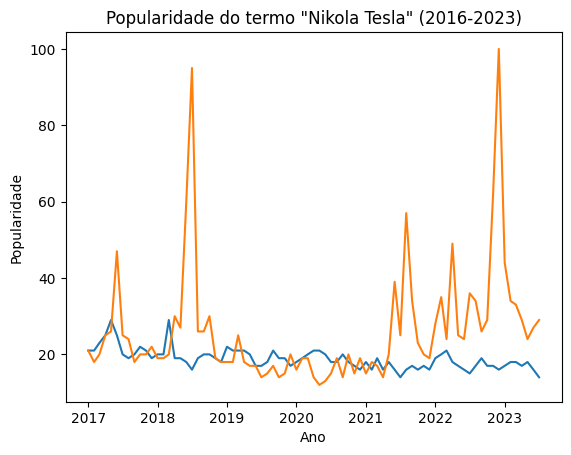

In [102]:
import matplotlib.pyplot as plt

palavras_chave = ['Einstein', 'Cristiano Ronaldo']
pytrends.build_payload(palavras_chave, cat=0, timeframe='2017-01-01 2023-07-01', geo='')
dados_tendencias = pytrends.interest_over_time()

plt.plot(dados_tendencias.index, dados_tendencias['Einstein'])
plt.plot(dados_tendencias.index, dados_tendencias['Cristiano Ronaldo'])
plt.xlabel('Ano')
plt.ylabel('Popularidade')
plt.title('Popularidade do termo "Nikola Tesla" (2016-2023)')
plt.show()

In [23]:
array1 = np.load('popularities_part0.npy')

In [38]:
array1 = np.load('popularities_part0.npy')
array2 =  np.load('popularities_part1.npy')
array3 =  np.load('popularities_part2.npy')
array4 =  np.load('popularities_part3.npy')
array5 =  np.load('popularities_part5.npy')
array6 =  np.load('popularities_part6.npy')
array7 =  np.load('popularities_part7.npy')
array8 =  np.load('popularities_part8.npy')
array9 =  np.load('popularities_part9.npy')



results = np.concatenate((array1, array2, array3, array4, array5, array6, array7, array8, array9))

In [39]:
df['popularity'] = results

In [48]:
df.to_csv('data/popularities.csv', index = False)